# Machine Learning: Clustering

As opposed to supervised learning, unsupervised learning does not require labels. Instead, those algorithms will try to learn patterns in the data in a form of various tasks:

- Clustering: Finding groups of similar instances
- Anomaly detection: Learn what "normal" data looks like and highlight abnormal instances
- Density estimation: Estimate the probability density function that generated the data

## Kmeans

In the first exercise, we will tackle one of the most famous clustering algorithms; KMeans. Consider the following dataset:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
centroids = [[-5, 1], [-2, 1], [-4, 4], [0, -1], [3, 4]]

X = [np.random.multivariate_normal(c, [[0.4, 0], [0, 0.4]], 1000) for c in centroids]
X = np.asarray(X).reshape(5 * 1000, 2)

Text(0, 0.5, 'Y')

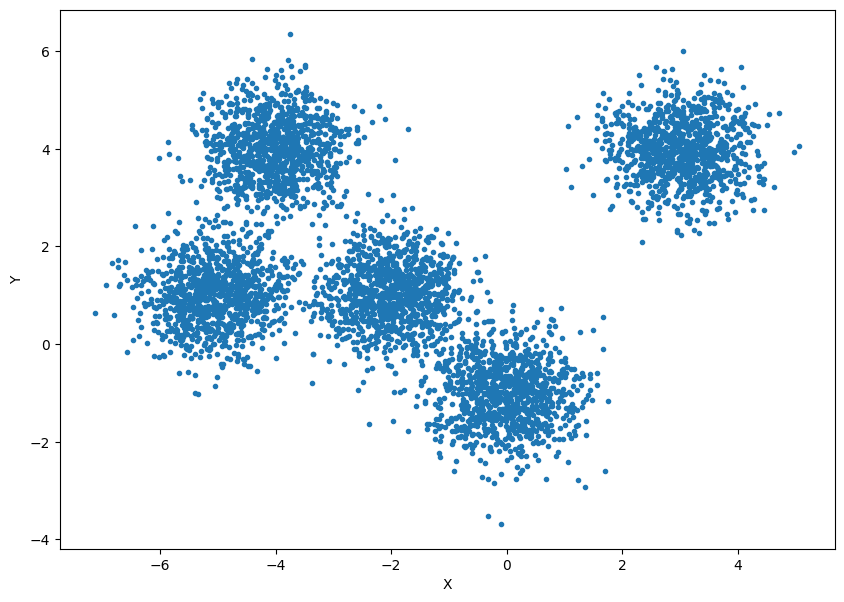

In [6]:
plt.figure(figsize=(10, 7))
plt.plot(X[:, 0], X[:, 1], '.')
plt.xlabel('X')
plt.ylabel('Y')

As a first exercise, try to find back the 5 clusters that are implicitely present in the dataset. Plot the decision surface of the algorithm, and indicate where the data points and the cluster centers are.

In [7]:
from sklearn.cluster import KMeans

In [8]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [9]:
kmeans.cluster_centers_

array([[ 3.02249266,  3.96931315],
       [-2.00384541,  1.04478202],
       [-4.01292353,  4.01672968],
       [-0.02223402, -1.01653328],
       [-5.06726525,  0.99516488]])

In [10]:
x_min, x_max = -8, 5
y_min, y_max = -4, 7
step = 0.01

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step)
)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'Y')

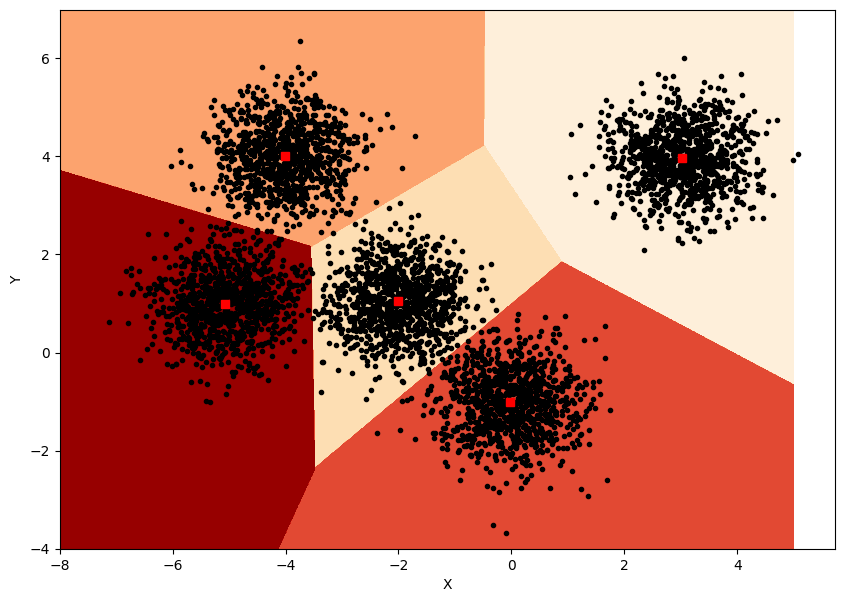

In [11]:
plt.figure(figsize=(10, 7))
cs = plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.OrRd)
plt.plot(X[:, 0], X[:, 1], 'k.')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'rs')
plt.xlabel('X')
plt.ylabel('Y')

You might be wondering if the solution to the KMeans problem is unique ? While the algorithm is guaranteed to converge, it is not guaranteed to find the optimal solution. This mainly depends on the initialiation of the cluster centers. Therefore, Scikit-Learn runs the algorithm 10 times (by default), and selects the one with the highest score. But which score ? It uses the **model's inertia** to find the best run. This inertia of a model is the mean squared distance between each instance and its closest centroid. As an exercise, represent the model's inertia for the previous dataset, for k ranging from 2 to 10.

In [12]:
def clustering(k:int, X: np.ndarray) -> KMeans:
    """Finds k clusters in a given dataset X with KMeans"""
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans

In [13]:
k_ = np.arange(2, 11)
kmeans_ = [clustering(k, X) for k in k_]

Text(0, 0.5, 'Model Intertia')

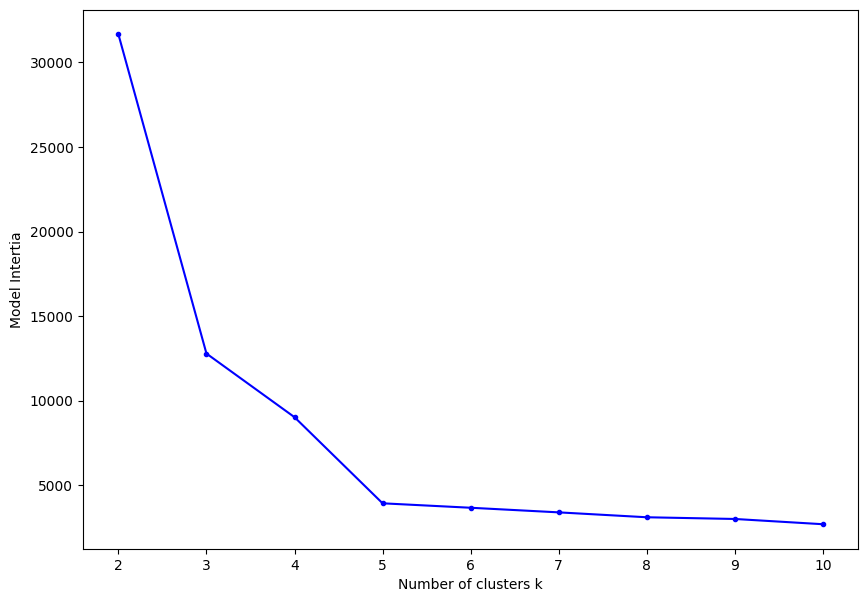

In [14]:
plt.figure(figsize=(10, 7))
plt.plot(k_, [model.inertia_ for model in kmeans_], 'b.-')
plt.xlabel('Number of clusters k')
plt.ylabel('Model Intertia')

What happens here ? Why couldn't we just take k=10 ? Can you plot the decision surface for k = 10 ?

The model inertia is actually not a good performance metric. It is useful to compare two fit based on the same number of clusters, but here when k reaches 10, the low inertia just means that the clusters lie closer to the data points, which is totally normal since you have a higher number of clusters. Note that we indeed see an elbow at $k=5$, which would be a good guess if we would not know the number of clusters beforehand. Increasing $k$ beyond 5 then reduces the intertia by very small steps.

In [15]:
def plot_decision_surface(kmeans: KMeans, X: np.ndarray) -> None:

    """Plots the decision surface of KMeans based on dataset X"""
    
    # compute range of X and Y
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    step = 0.01
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )
    # Construct a grid of points and compute the prediction at those points
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    cs = plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.OrRd)
    plt.plot(X[:, 0], X[:, 1], 'k.')
    plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'rs')
    plt.xlabel('X')
    plt.ylabel('Y')
    

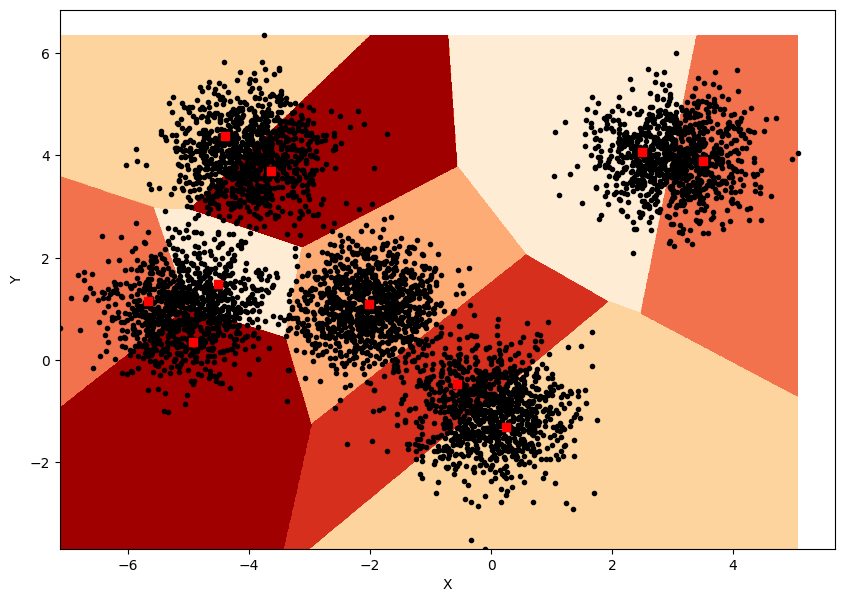

In [16]:
plot_decision_surface(kmeans_[-1], X)

Can you perform the same analysis, but using the silhouette score (mean silhouette coefficient over all instances) instead of the model's intertia. Also represent the silhouette diagram for $k=5$, $k=4$, and for $k=10$. What do you observe ? Can you explain how to infer that $k=5$ based on your results ?

<b>Silhouette Coefficient:</b>
<p>
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
    <ul>
        <li>1: Means clusters are well apart from each other and clearly distinguished.</li>
        <li>0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.</li>
        <li>-1: Means clusters are assigned in the wrong way.</li>
    </ul>
    </p>

Text(0, 0.5, 'Silhouette Score')

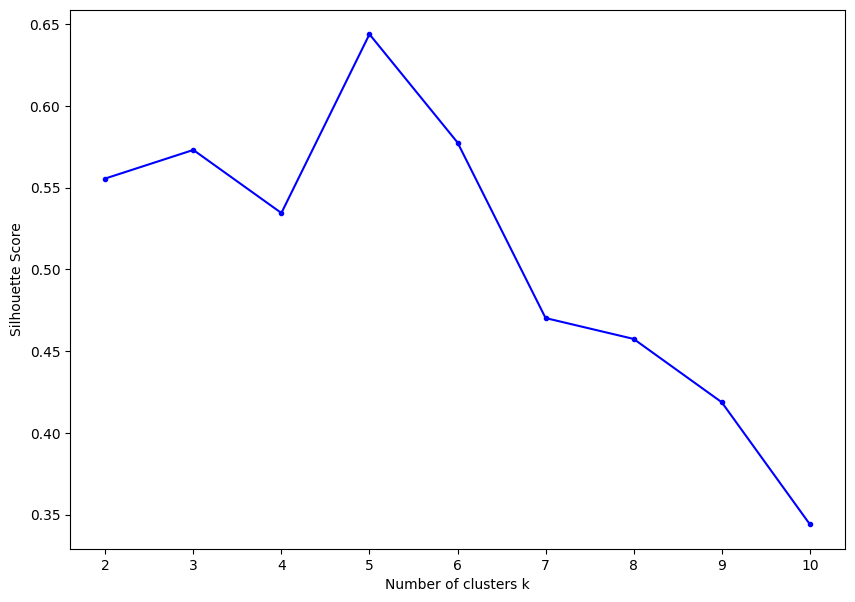

In [17]:
from sklearn.metrics import silhouette_score

plt.figure(figsize=(10, 7))
plt.plot(k_, [silhouette_score(X, model.labels_) for model in kmeans_], 'b.-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')

In [18]:
!conda install -c districtdatalabs yellowbrick --yes

zsh:1: command not found: conda


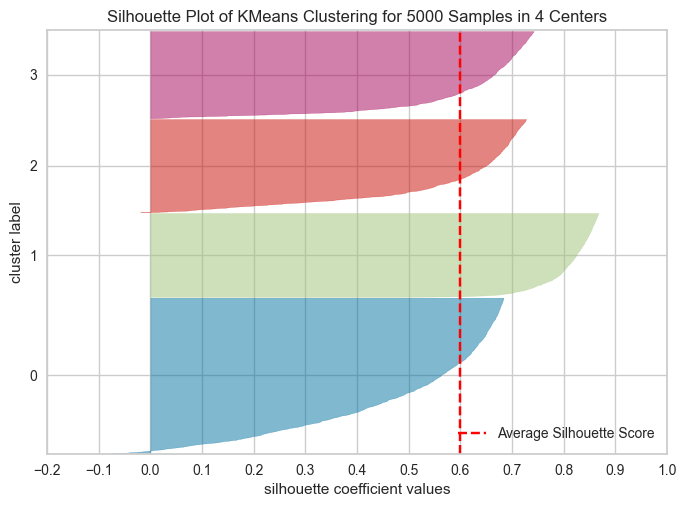

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

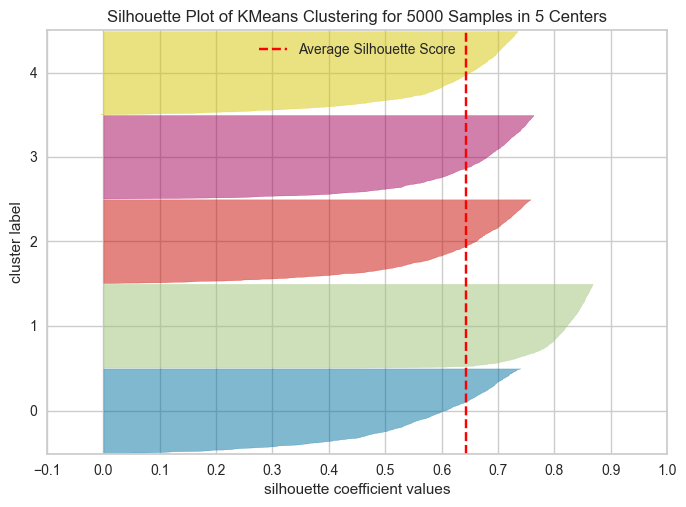

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

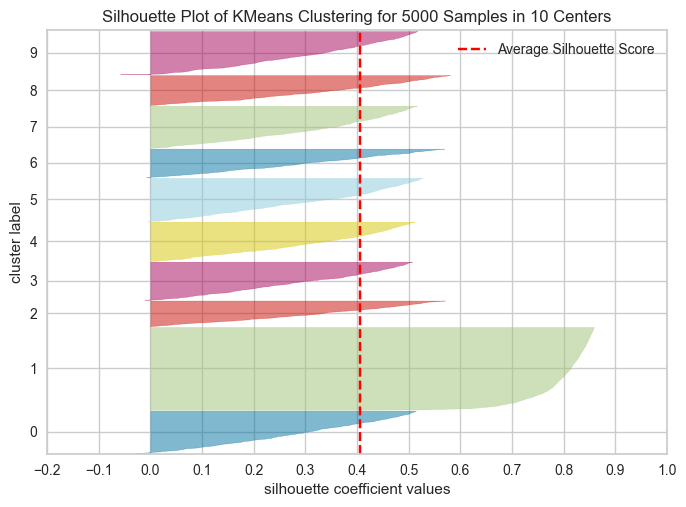

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
# Instantiate the clustering model and visualizer
model = KMeans(10, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The dashed lines on the plots above represent the silhouette score of the model (see plot 3 cells above). If most of the instances have a silhouette score that is lower than this score, it generally means that the cluster is bad (its instances are actually too close to other clusters). On the other hand, the silhouette diagrams for $k=4$ and $k=5$ perform good since most instances extend beyond the dashed line, and the cluster themselves have similar sizes. Overall, it might be a good choice to take $k=5$.

# Exercises

Find the best fitting clusters for the dataset by calculating the silhouette scores. Visualize the outcome of the optimal clusters.

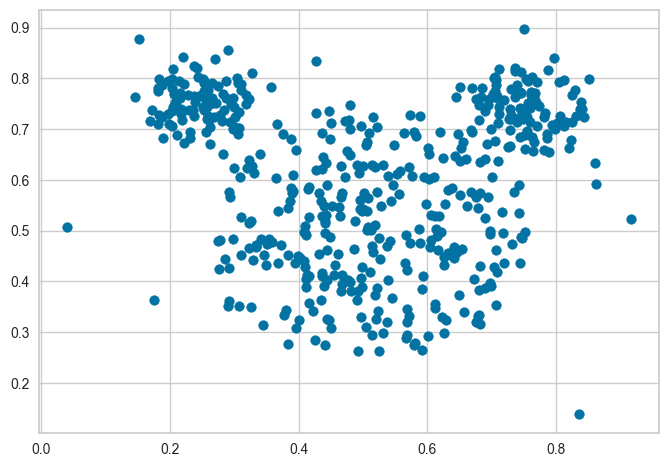

In [22]:
with open('mouse.txt') as file:
    mouse = np.loadtxt(file)

plt.scatter(mouse[:, 0], mouse[:, 1])
plt.show()

In [23]:
k_ = np.arange(2, 11)
kmeans_ = [clustering(k, mouse) for k in k_]

Text(0, 0.5, 'Silhouette Score')

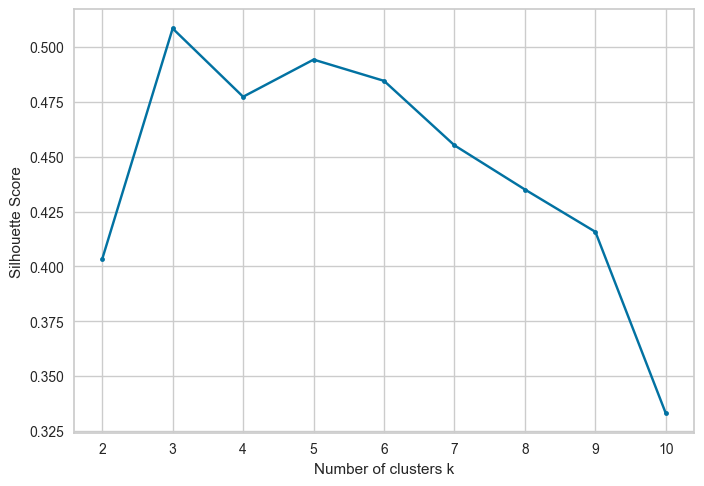

In [24]:
from sklearn.metrics import silhouette_score

plt.plot(k_, [silhouette_score(mouse, model.labels_) for model in kmeans_], 'b.-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')

In [25]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(mouse)

Text(0, 0.5, 'Y')

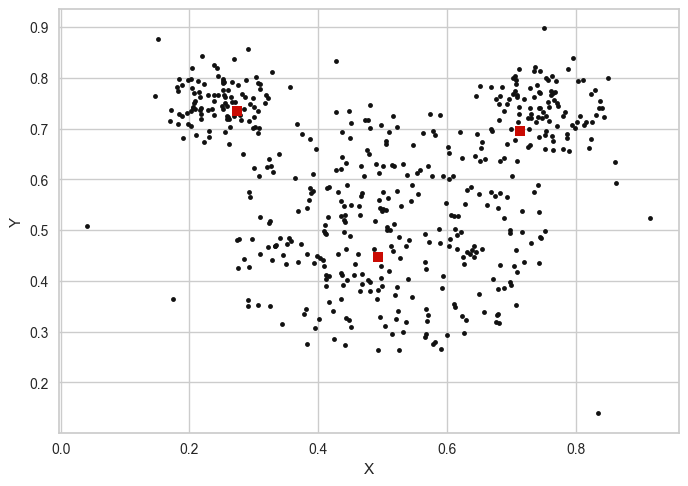

In [26]:
plt.plot(mouse[:, 0], mouse[:, 1], 'k.')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'rs')
plt.xlabel('X')
plt.ylabel('Y')

In [27]:
# colors to be used in plots
from random import randint
colors = np.array([])
for i in range(20):
    colors = np.append(colors, ['#%06X' % randint(0, 0xFFFFFF)])

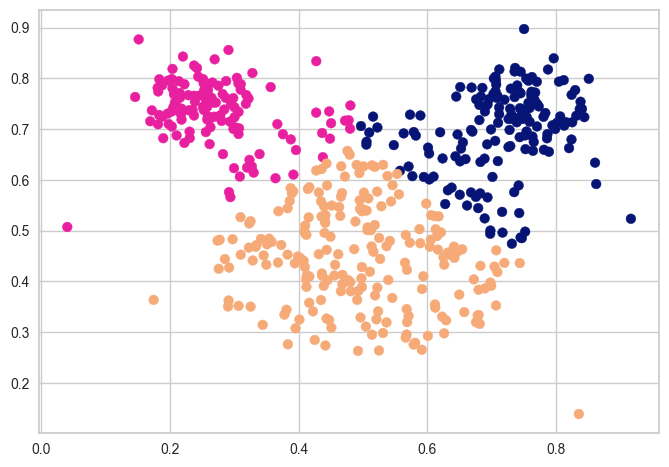

In [28]:
plt.scatter(mouse[:, 0], mouse[:, 1], color=colors[kmeans.labels_])
plt.show()

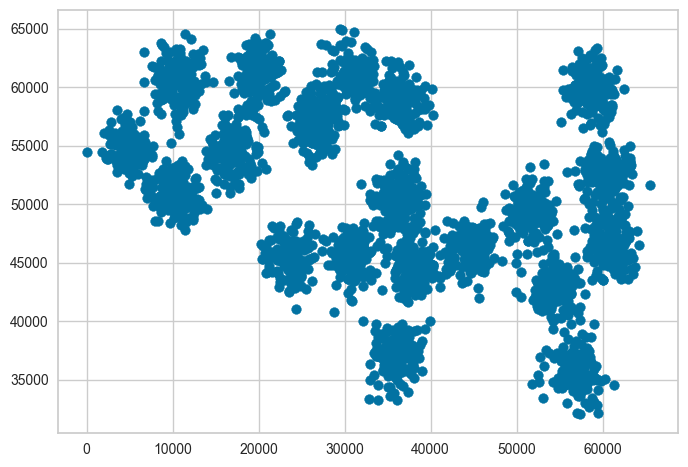

In [29]:
with open('a1.txt') as file:
    a1 = np.loadtxt(file)

plt.scatter(a1[:, 0], a1[:, 1])
plt.show()

In [30]:
k_ = np.arange(2, 30)
kmeans_ = [clustering(k, a1) for k in k_]

Text(0, 0.5, 'Silhouette Score')

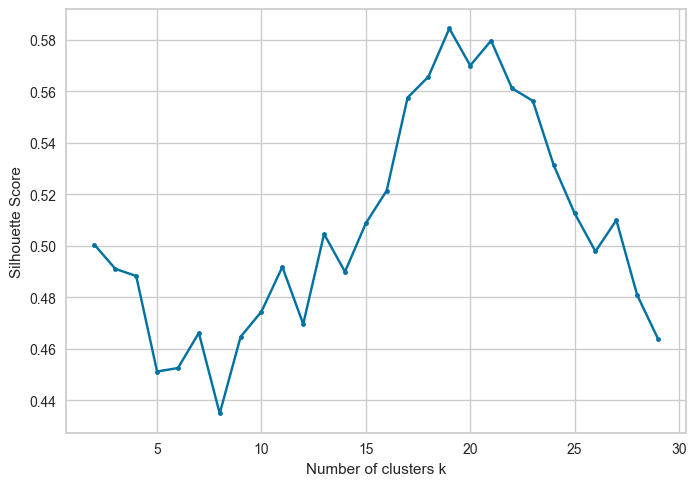

In [31]:
from sklearn.metrics import silhouette_score

plt.plot(k_, [silhouette_score(a1, model.labels_) for model in kmeans_], 'b.-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')

In [32]:
kmeans = KMeans(n_clusters=20)
y_pred = kmeans.fit_predict(a1)

Text(0, 0.5, 'Y')

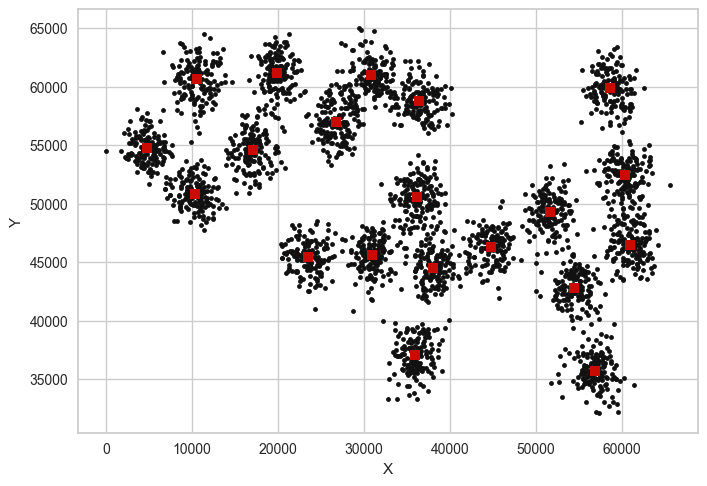

In [33]:
plt.plot(a1[:, 0], a1[:, 1], 'k.')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'rs')
plt.xlabel('X')
plt.ylabel('Y')

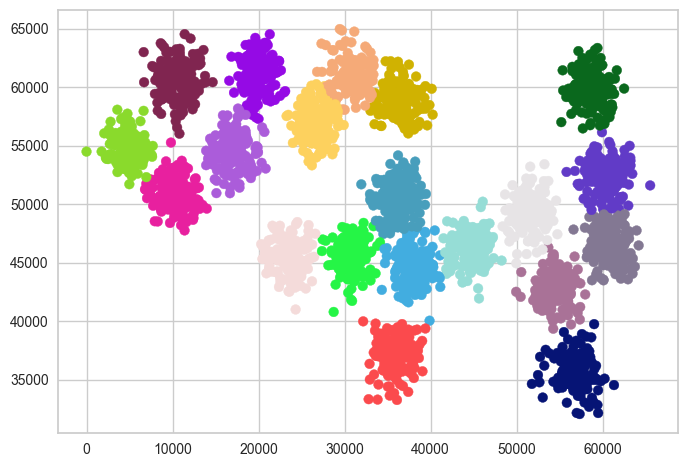

In [34]:
plt.scatter(a1[:, 0], a1[:, 1], color=colors[kmeans.labels_])
plt.show()

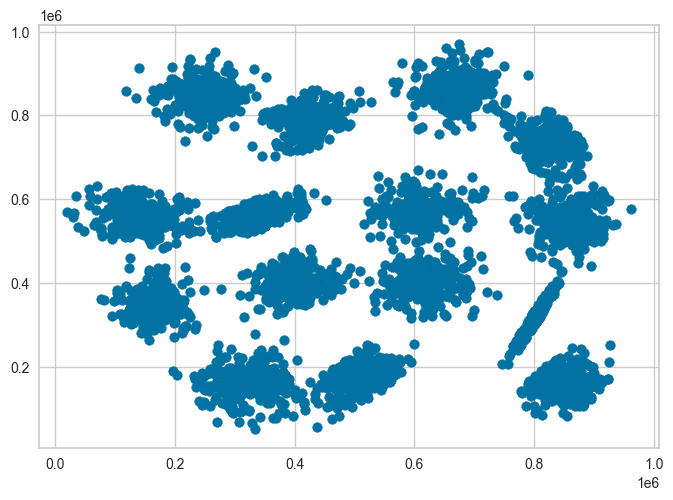

In [35]:
with open('s1.txt') as file:
    s1 = np.loadtxt(file)

plt.scatter(s1[:, 0], s1[:, 1])
plt.show()

In [41]:
k_ = np.arange(2, 30)
kmeans_ = [clustering(k, s1) for k in k_]

Text(0, 0.5, 'Silhouette Score')

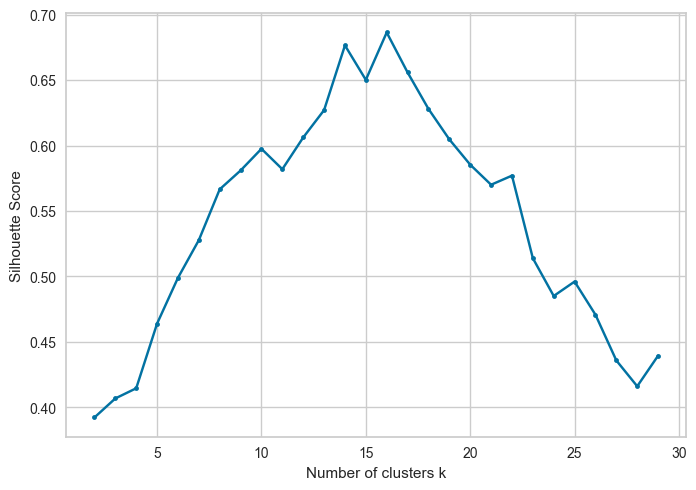

In [37]:
from sklearn.metrics import silhouette_score

plt.plot(k_, [silhouette_score(s1, model.labels_) for model in kmeans_], 'b.-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')

In [38]:
kmeans = KMeans(n_clusters=15)
y_pred = kmeans.fit_predict(s1)

Text(0, 0.5, 'Y')

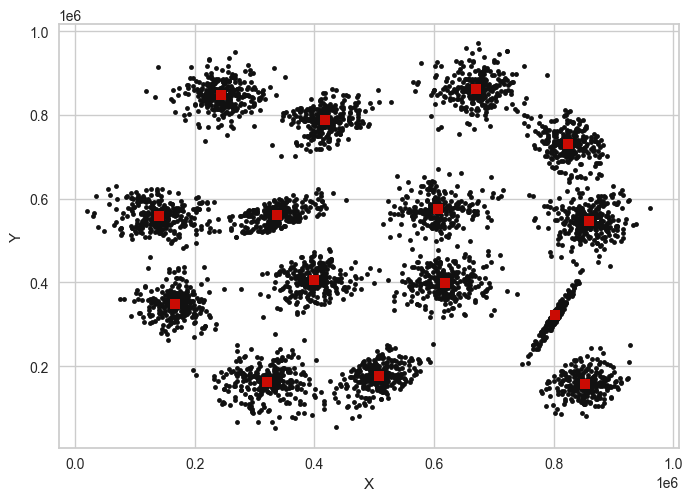

In [39]:
plt.plot(s1[:, 0], s1[:, 1], 'k.')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'rs')
plt.xlabel('X')
plt.ylabel('Y')

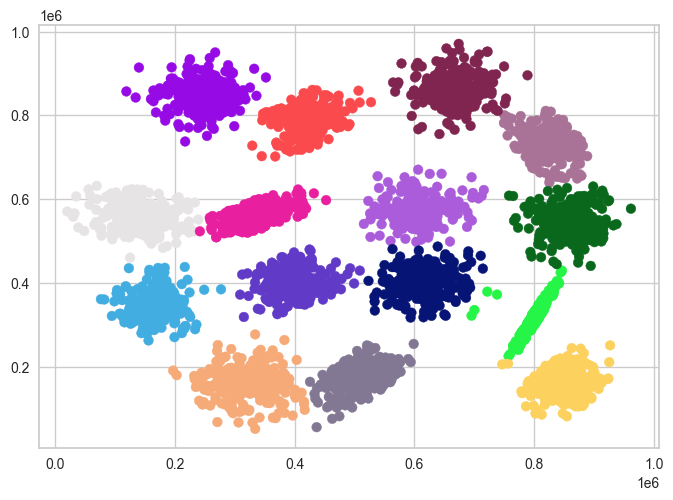

In [40]:
plt.scatter(s1[:, 0], s1[:, 1], color=colors[kmeans.labels_])
plt.show()